In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
import numpy as np

dir = '/cosma5/data/durham/dc-fras4/ultrasound/output_frames/for_vae/all_images/MFT'
df = pd.read_csv('data_tables/all_data.csv')

# Convert Score column to numeric (coerce non-numeric values like 'NI' to NaN)
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Check what scores exist for MFT
mft_df = df[df['Hospital'] == 'MFT']
print(f"Total MFT records: {len(mft_df)}")
print(f"Unique scores in MFT: {mft_df['Score'].unique()}")

# find MFT videos which have score of 0,1,2,3
mft_videos_0 = mft_df[mft_df['Score'] == 0]['File Path'].unique()
mft_videos_1 = mft_df[mft_df['Score'] == 1]['File Path'].unique()
mft_videos_2 = mft_df[mft_df['Score'] == 2]['File Path'].unique()
mft_videos_3 = mft_df[mft_df['Score'] == 3]['File Path'].unique()

print(f"\nVideos with Score 0: {len(mft_videos_0)}")
print(f"Videos with Score 1: {len(mft_videos_1)}")
print(f"Videos with Score 2: {len(mft_videos_2)}")
print(f"Videos with Score 3: {len(mft_videos_3)}")

# Number of random samples to print
n_samples = 10

# for random selection print patient id and scan no and scan label
print(f"\nScore 0 (random {min(n_samples, len(mft_videos_0))} samples):")
for video in np.random.choice(mft_videos_0, size=min(n_samples, len(mft_videos_0)), replace=False):
    df_0 = df[(df['File Path'] == video)]
    print(df_0[['Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().values)

print(f"\nScore 1 (random {min(n_samples, len(mft_videos_1))} samples):")
for video in np.random.choice(mft_videos_1, size=min(n_samples, len(mft_videos_1)), replace=False):
    df_1 = df[(df['File Path'] == video)]
    print(df_1[['Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().values)

print(f"\nScore 2 (random {min(n_samples, len(mft_videos_2))} samples):")
for video in np.random.choice(mft_videos_2, size=min(n_samples, len(mft_videos_2)), replace=False):
    df_2 = df[(df['File Path'] == video)]
    print(df_2[['Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().values)

print(f"\nScore 3 (random {min(n_samples, len(mft_videos_3))} samples):")
for video in np.random.choice(mft_videos_3, size=min(n_samples, len(mft_videos_3)), replace=False):
    df_3 = df[(df['File Path'] == video)]
    print(df_3[['Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().values)

Total MFT records: 1744
Unique scores in MFT: [ 1.  2.  0.  3. nan]

Videos with Score 0: 460
Videos with Score 1: 824
Videos with Score 2: 435
Videos with Score 3: 8

Score 0 (random 10 samples):
[[23 'LUS_3' 'RAB']]
[[32 'LUS_3' 'Rax']]
[[14 'LUS_3' 'Rax']]
[[3 'LU_4' 'LAB']]
[[19 'LUS_3' 'RPB']]
[[3 'LUS_2' 'LAA']]
[[24 'LUS_2' 'LPB']]
[[6 'LU_4' 'RAA']]
[[22 'LU_4' 'LAB']]
[[28 'LU_4' 'LAB']]

Score 1 (random 10 samples):
[[18 'LU_4' 'RAA']]
[[4 'LUS_3' 'RPB']]
[[25 'LU_4' 'LAB']]
[[10 'LUS_1' 'RAB']]
[[32 'LUS_1' 'LAX']]
[[30 'LUS_1' 'RPA']]
[[18 'LU_4' 'LAB']]
[[20 'LUS_2' 'RPB']]
[[15 'LUS_3' 'RAA']]
[[32 'LUS_3' 'LPB']]

Score 2 (random 10 samples):
[[12 'LUS_2' 'Rax']]
[[25 'LU_4' 'RPB']]
[[15 'LUS_1' 'Rax']]
[[19 'LUS_1' 'RAB']]
[[16 'LUS_3' 'LPA']]
[[23 'LUS_1' 'LPA']]
[[33 'LUS_2' 'Rax']]
[[18 'LUS_1' 'LPB']]
[[7 'LUS_1' 'LPB']]
[[6 'LUS_2' 'RPB']]

Score 3 (random 8 samples):
[[26 'LUS_3' 'LAB']]
[[26 'LU_4' 'LPA']]
[[26 'LU_4' 'LPB']]
[[26 'LUS_3' 'LAX']]
[[17 'LU_4' 'RPB

Plotting Score 0 frames...


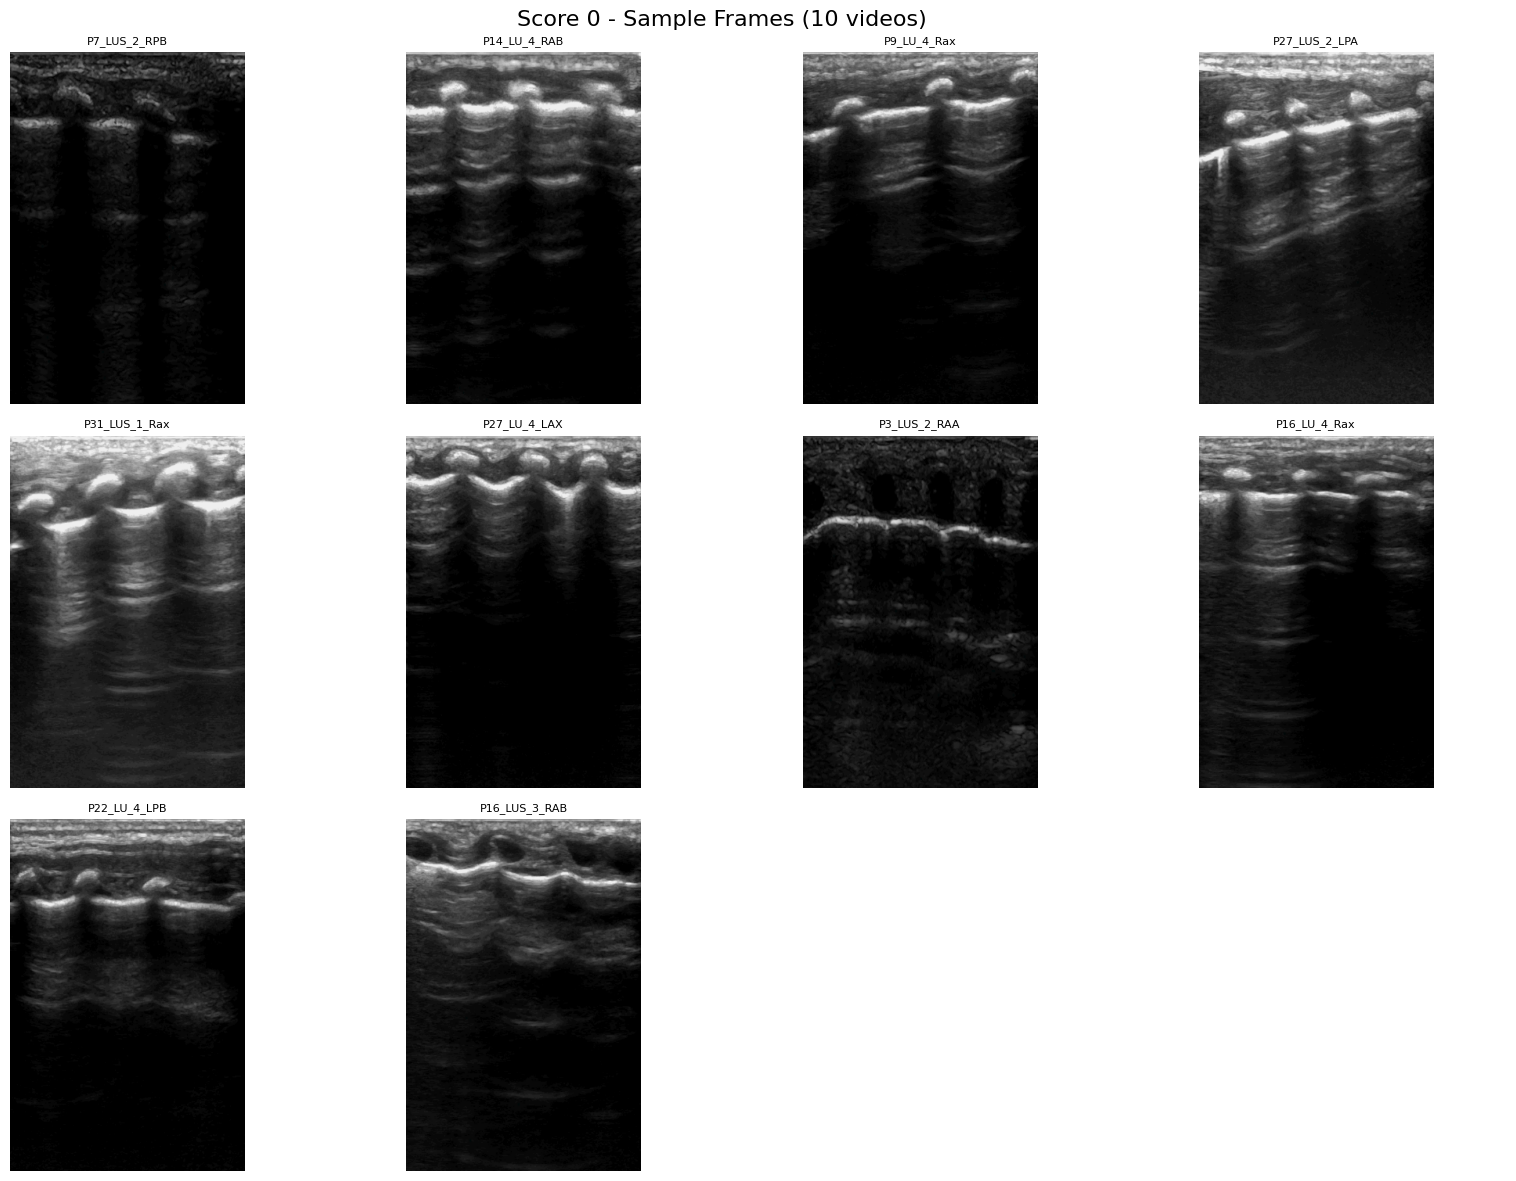


Plotting Score 1 frames...


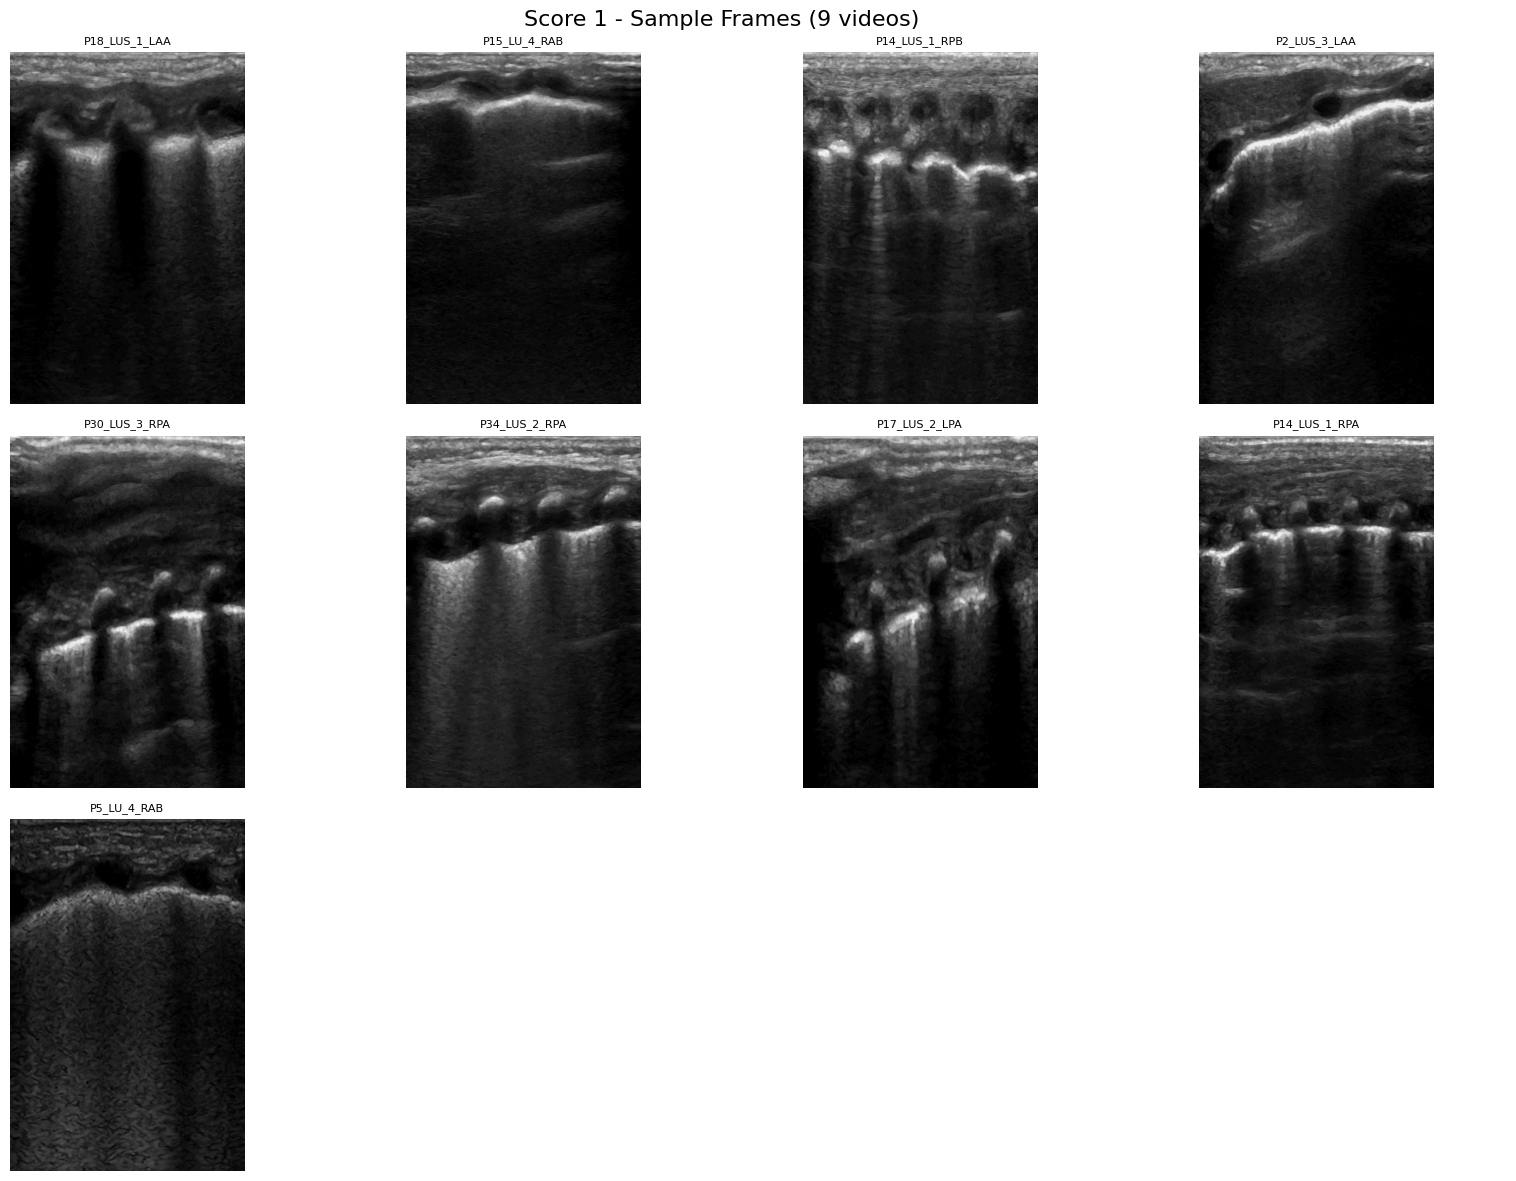


Plotting Score 2 frames...


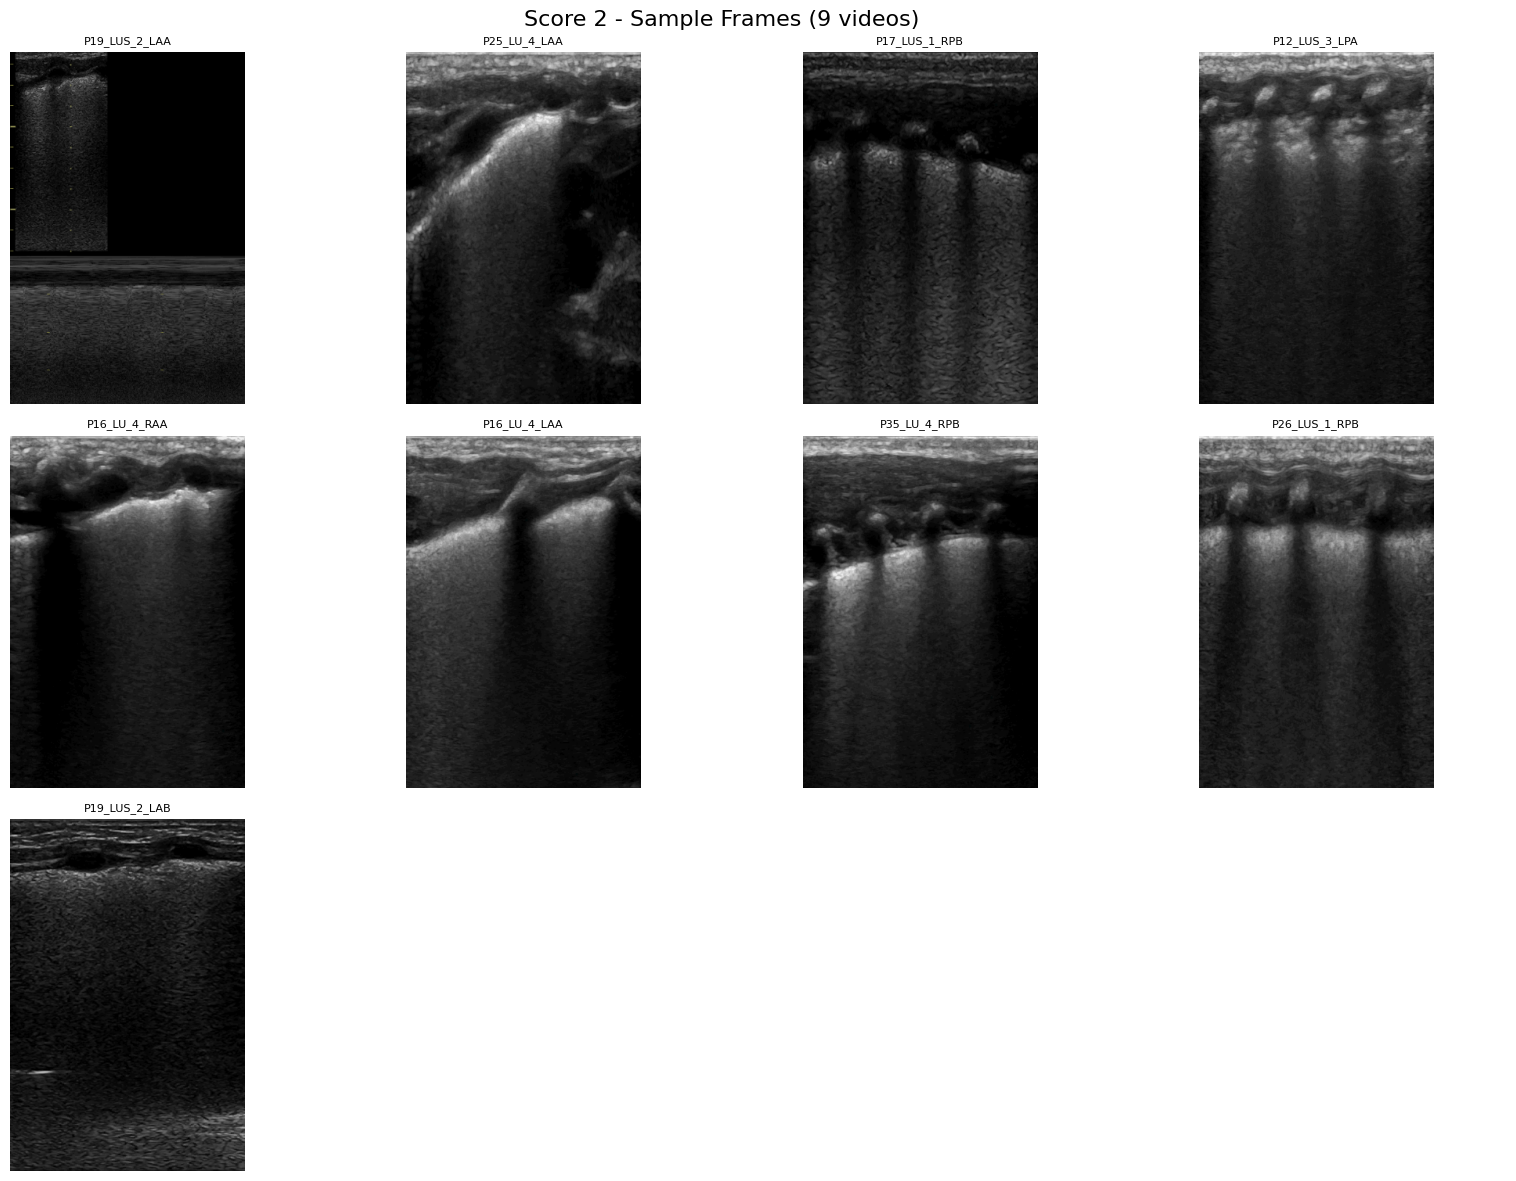


Plotting Score 3 frames...


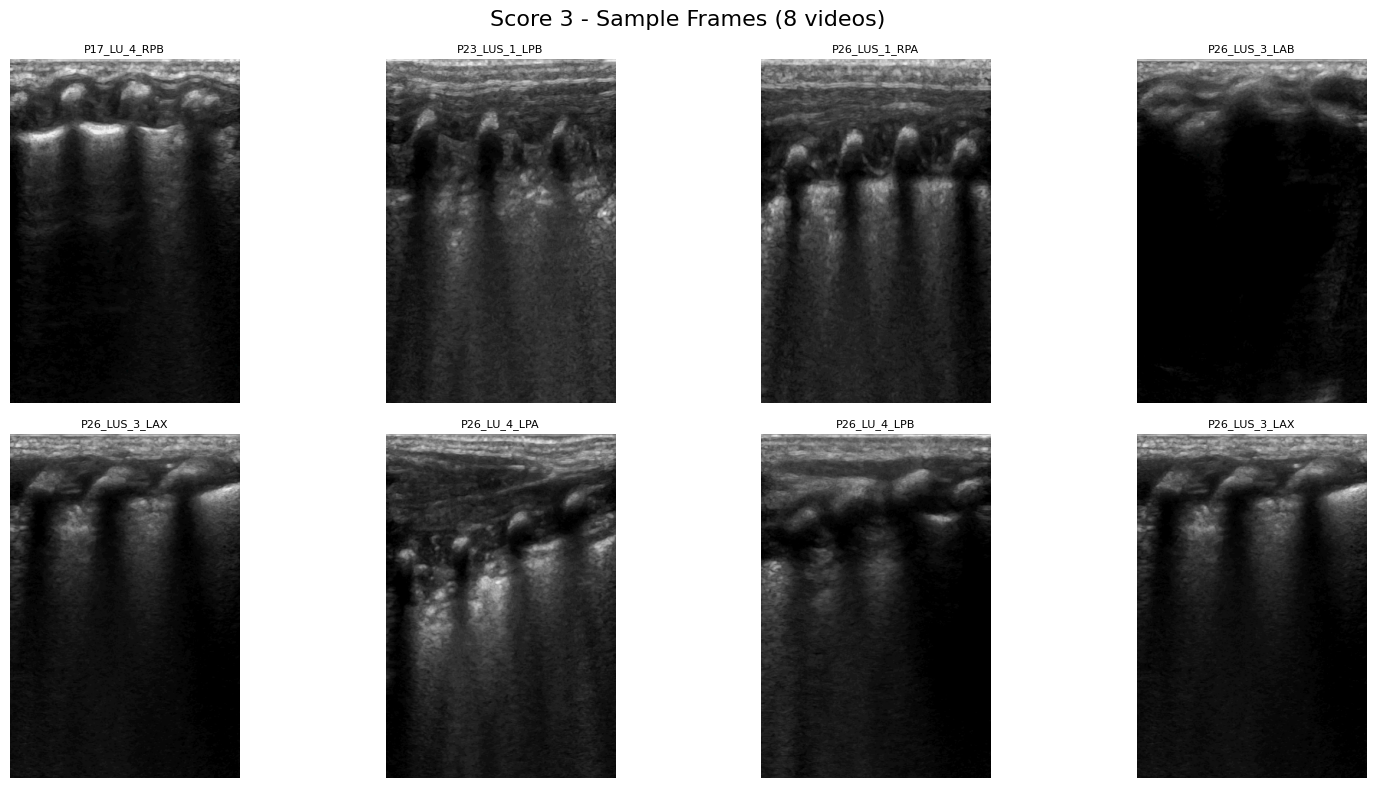

In [8]:
import os
import glob

def get_frames_for_video(patient_id, scan_no, scan_label, base_dir):
    """Find all frame files matching the patient_id, scan_no, and scan_label."""
    # Format: 26_LU_4_LPA_selected_frame_0009.png
    # Convert scan_no from LUS_2 format to LU_2 if needed
    pattern = f"{patient_id}_{scan_no}_{scan_label}_selected_frame_*.png"
    matching_files = glob.glob(os.path.join(base_dir, pattern))
    return sorted(matching_files)

def plot_sample_frames_for_score(mft_videos, df, base_dir, score, n_samples=10, n_cols=4, n_frames_per_video=1):
    """Plot sample frames for a given score."""
    if len(mft_videos) == 0:
        print(f"No videos found for Score {score}")
        return
    
    # Random sample of videos
    sample_videos = np.random.choice(mft_videos, size=min(n_samples, len(mft_videos)), replace=False)
    
    all_frames = []
    video_info = []
    
    for video in sample_videos:
        video_df = df[df['File Path'] == video]
        row = video_df[['Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().iloc[0]
        
        frames = get_frames_for_video(row['Patient ID'], row['Scan No'], row['Scan Label'], base_dir)
        if frames:
            # Take middle frame
            mid_idx = len(frames) // 2
            all_frames.append(frames[mid_idx])
            video_info.append((row['Patient ID'], row['Scan No'], row['Scan Label']))
    
    if not all_frames:
        print(f"No frames found in directory for Score {score}")
        return
    
    n_rows = (len(all_frames) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    if n_rows == 1 and n_cols > 1:
        axes = axes.reshape(1, -1)
    if n_rows > 1:
        axes = axes.flatten()
    elif n_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    fig.suptitle(f'Score {score} - Sample Frames ({len(all_frames)} videos)', fontsize=16)
    
    for idx, (frame_path, info) in enumerate(zip(all_frames, video_info)):
        img = cv2.imread(frame_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(img)
        axes[idx].set_title(f"P{info[0]}_{info[1]}_{info[2]}", fontsize=8)
        axes[idx].axis('off')
    
    # Hide empty subplots
    for idx in range(len(all_frames), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot frames for each score
print("Plotting Score 0 frames...")
plot_sample_frames_for_score(mft_videos_0, df, dir, score=0, n_samples=10)

print("\nPlotting Score 1 frames...")
plot_sample_frames_for_score(mft_videos_1, df, dir, score=1, n_samples=10)

print("\nPlotting Score 2 frames...")
plot_sample_frames_for_score(mft_videos_2, df, dir, score=2, n_samples=10)

print("\nPlotting Score 3 frames...")
plot_sample_frames_for_score(mft_videos_3, df, dir, score=3, n_samples=10)

In [13]:
# plot frame from specific patient id, scan no and scan label

def plot_frame(patient_id, scan_no, scan_label, base_dir):

    frames = get_frames_for_video(patient_id, scan_no, scan_label, base_dir)
    if not frames:
        print(f"No frames found for {patient_id}, {scan_no}, {scan_label}")
        return
    
    mid_idx = len(frames) // 2
    frame_path = frames[mid_idx]
    
    img = cv2.imread(frame_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    # plt.title(f"Frame from {patient_id}, {scan_no}, {scan_label}")
    plt.axis('off')
    plt.show()

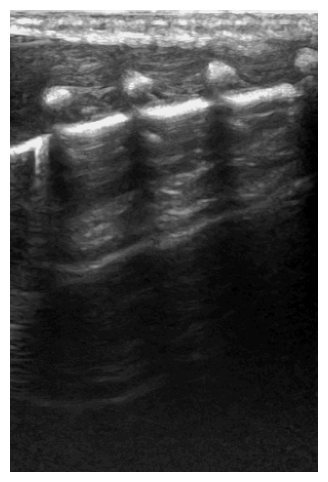

In [14]:
plot_frame('27', 'LUS_2', 'LPA', dir)

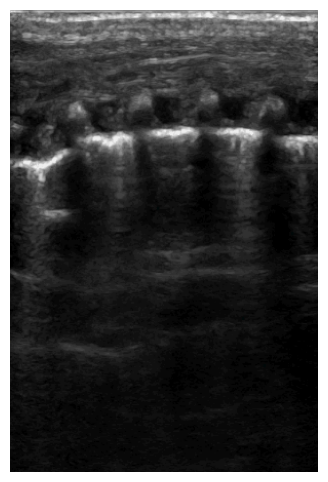

In [15]:
plot_frame('14', 'LUS_1', 'RPA', dir)

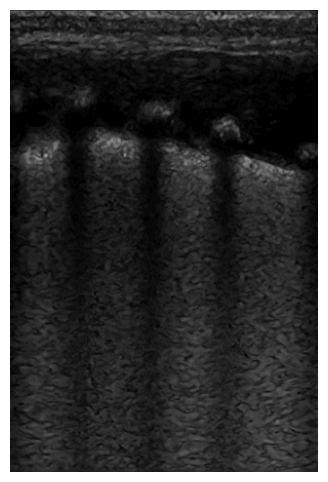

In [16]:
plot_frame('17', 'LUS_1', 'RPB', dir)

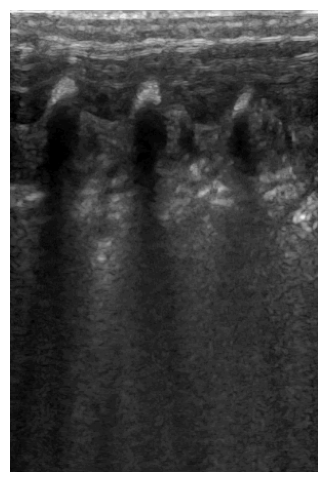

In [17]:
plot_frame('23', 'LUS_1', 'LPB', dir)

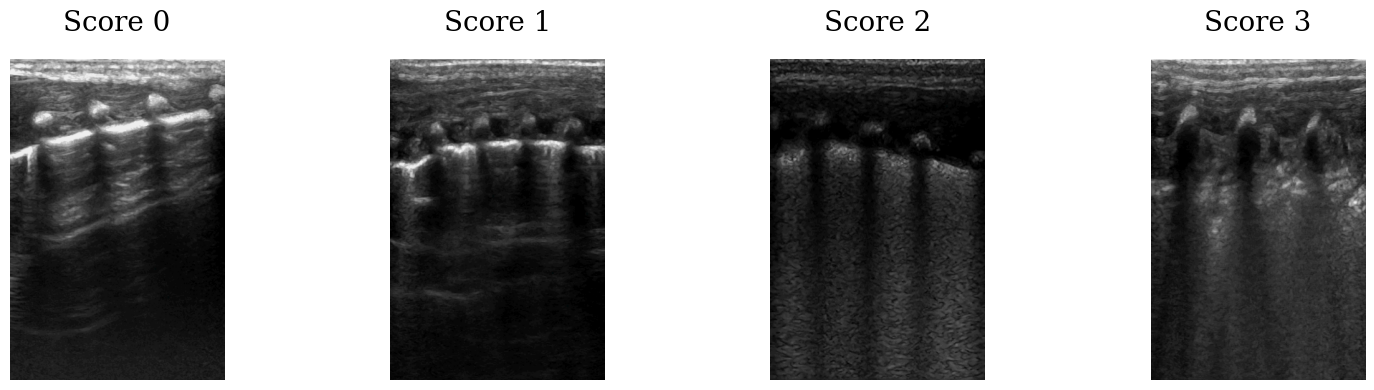

In [22]:
# Plot all 4 frames together with their scores

def get_score_for_video(patient_id, scan_no, scan_label, df):
    """Get the score for a specific video."""
    mask = (df['Patient ID'] == int(patient_id)) & (df['Scan No'] == scan_no) & (df['Scan Label'] == scan_label)
    scores = df.loc[mask, 'Score'].dropna().unique()
    if len(scores) > 0:
        return int(scores[0])
    return None

# Define the 4 frames to plot
frames_to_plot = [
    ('27', 'LUS_2', 'LPA'),
    ('14', 'LUS_1', 'RPA'),
    ('17', 'LUS_1', 'RPB'),
    ('23', 'LUS_1', 'LPB'),
]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, (patient_id, scan_no, scan_label) in enumerate(frames_to_plot):
    frames = get_frames_for_video(patient_id, scan_no, scan_label, dir)
    
    if frames:
        mid_idx = len(frames) // 2
        frame_path = frames[mid_idx]
        img = cv2.imread(frame_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        score = get_score_for_video(patient_id, scan_no, scan_label, df)
        
        axes[idx].imshow(img)
        axes[idx].set_title(f"Score {score}", fontsize=20, fontname='DejaVu Serif', pad=20)
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, 'No frame found', ha='center', va='center')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()